In [5]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
DATA_PATH = '/'

In [6]:
car_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

car_mpg['mpg']
car_mpg.mpg
car_mpg.iloc[0,:]

car_mpg.to_csv(f'{DATA_PATH}car_mpg.csv', index=False)
car_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [7]:
for col in list(car_mpg)[:-1]:
    v = int(car_mpg[col].mean())
    car_mpg[col] = car_mpg[col].fillna(v)
car_mpg['company'] = car_mpg.car_name.str.split(expand=True)[0].values
car_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,ford
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,vw
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,dodge
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,ford


# car_mpg_preprocessed.csv -> biến car_mpg

## Câu 7

Text(0.5, 1.0, 'Scatter plot giữa Cylinders và Displacement')

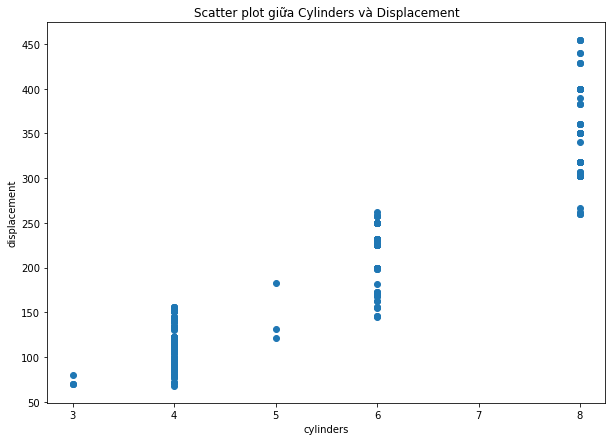

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(car_mpg['cylinders'], car_mpg['displacement'])
plt.xlabel('cylinders')
plt.ylabel('displacement')
plt.title('Scatter plot giữa Cylinders và Displacement')

Nhận xét:
- Ta có thể quan sát rõ được sự tương quan thuận giữa số cylinder và displacement.
- Đúng như trong thực tế, những cỗ máy có nhiều xi-lanh thường đi với một dung tích lớn để tăng công suất cho xe.
- Động cơ 4 xi-lanh, dung tích nhỏ thường được sử dụng cho xe tầm trung, đa dụng nên có số lượng tương đối nhiều.

Text(0.5, 1.0, 'Scatter plot giữa Acceleration và Horsepower')

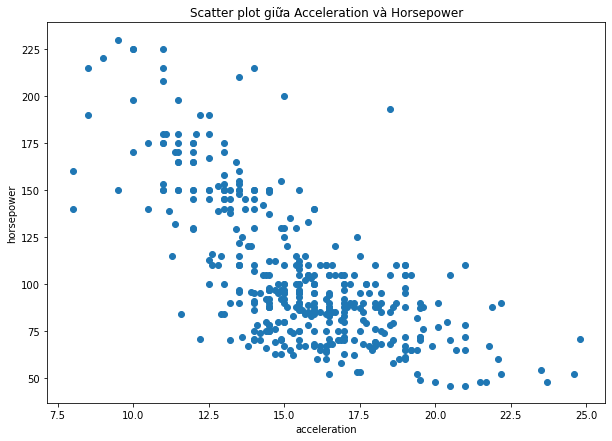

In [9]:
plt.figure(figsize=(10,7))
plt.scatter( car_mpg['acceleration'],car_mpg['horsepower'])
plt.xlabel('acceleration')
plt.ylabel('horsepower')
plt.title('Scatter plot giữa Acceleration và Horsepower')

Nhận xét:
- Ta có thể quan sát rõ được sự tương quan nghịch giữa chỉ số acceleration và horsepower.
- Điều đó thể hiện nếu xe có khả năng tăng tốc mạnh lúc đầu (acceleration cao) thì khi càng chạy nhanh sẽ khó đạt được vận tốc tối đa (công suất thấp - horsepower thấp) và ngược lại.
- Các điểm tập trung nhiều ở giữa biểu đồ thể hiện các dòng xe đều hướng đến sự cân bằng ở hai chỉ số này.

## Câu 8
Biểu đồ đường hiện số lượng xe được sản xuất mỗi năm của tất cả các hãng

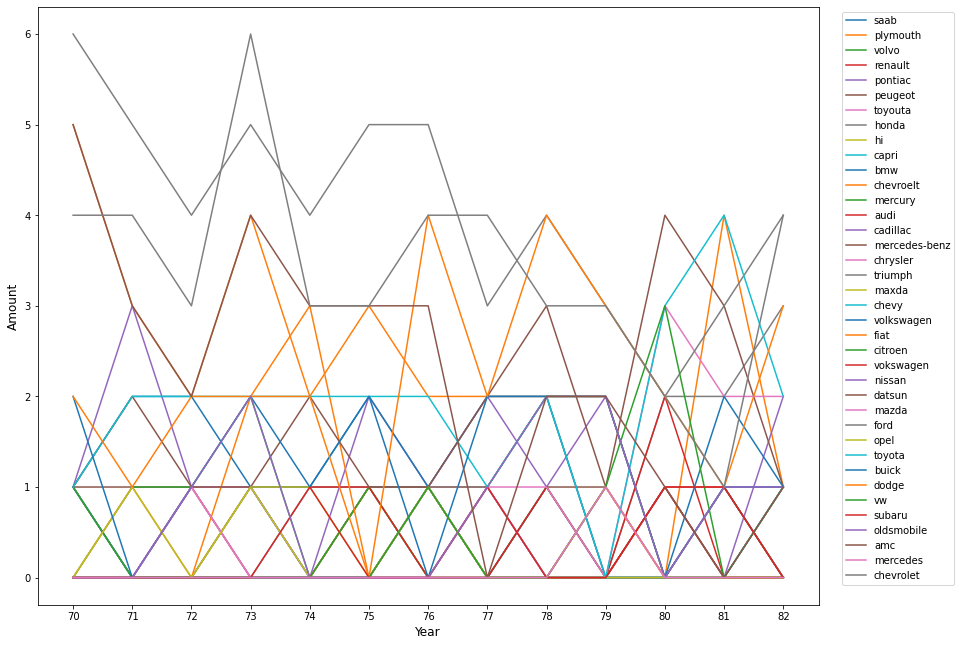

In [10]:
companyList = list(set(car_mpg['company'].values))
years = list(set(car_mpg['model'].values))
cpy = pd.DataFrame(columns=companyList)

for col in list(cpy):
    amount = []
    for year in years:
        amount.append(sum((car_mpg['model'] == year) & (car_mpg['company'] == col)))
    cpy[col] = amount
cpy.index = years

plt.figure(figsize =(14,11))
for col in list(cpy):
    plt.plot(cpy[col], label=col)
plt.xticks(cpy.index)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(bbox_to_anchor=(1.18, 1), loc=0)

## cpy: car per year của các hãng
#cpy
plt.show()

Nhận xét:
- Các hãng lớn sẽ ra mắt từ 2 - 6 xe mỗi năm, còn các hãng còn lại thì chỉ từ 1 - 2 xe.
- Các hãng xe có xu hướng ra mắt giảm dần số lượng dần về những năm cuối thập kỷ và cho ra mắt hàng loạt số lượng xe mới vào nhứng năm đầu của thập kỷ kế tiếp.

## Câu 9

Tính pairwise correlation (không rõ lắm)

In [14]:
import itertools
from scipy.stats.stats import pearsonr

car_9 = car_mpg[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']]

correlations = {}
columns = car_9.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + ' - ' + col_b] = pearsonr(car_9.loc[:, col_a], car_9.loc[:, col_b])

result = DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())

                                  PCC        p-value
cylinders - acceleration    -0.522452   8.183538e-30
cylinders - displacement     0.951787  1.933169e-209
cylinders - horsepower       0.840161  2.081677e-109
cylinders - weight           0.895220  6.751330e-144
displacement - acceleration -0.557984   1.335904e-34
displacement - horsepower    0.894739  1.620309e-143
displacement - weight        0.932475  9.461801e-181
horsepower - acceleration   -0.692295   3.254245e-59
horsepower - weight          0.862635  1.200434e-121
mpg - acceleration           0.410449   6.246651e-18
mpg - cylinders             -0.763451   1.028708e-78
mpg - displacement          -0.792077   1.239910e-88
mpg - horsepower            -0.759070   2.549519e-77
mpg - weight                -0.823985  1.021386e-101
weight - acceleration       -0.430086   1.039897e-19


In [15]:
car_9.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.763451,-0.792077,-0.759070,-0.823985,0.410449
cylinders,-0.763451,1.000000,0.951787,0.840161,0.895220,-0.522452
displacement,-0.792077,0.951787,1.000000,0.894739,0.932475,-0.557984
horsepower,-0.759070,0.840161,0.894739,1.000000,0.862635,-0.692295
weight,-0.823985,0.895220,0.932475,0.862635,1.000000,-0.430086
acceleration,0.410449,-0.522452,-0.557984,-0.692295,-0.430086,1.000000


Vẽ heatmap

Text(0.5, 1.0, 'Seaborn')

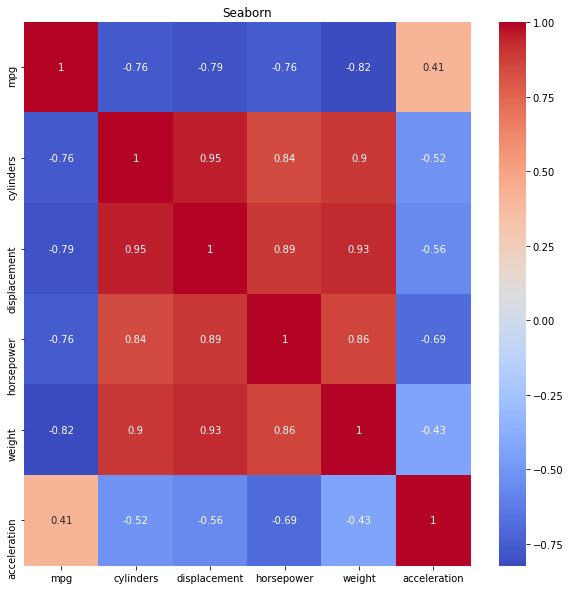

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(car_9.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')

Do you see some interesting correlation?
(Chịu :v)